In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt

from deep_topology import layers, data

In [2]:
data, labels = data.spheres(points_per_sphere=500)

## Numpy version

In [20]:
data_dimension = 101
encoding_dim = 2

inp = tf.keras.Input(shape=(data_dimension,))

encoded = tf.keras.layers.Dense(32)(inp)
encoded = tf.keras.layers.BatchNormalization()(encoded)
encoded = tf.keras.layers.Activation("relu")(encoded)
encoded = tf.keras.layers.Dense(32)(encoded)
encoded = tf.keras.layers.BatchNormalization()(encoded)
encoded = tf.keras.layers.Activation("relu")(encoded)
encoded = tf.keras.layers.Dense(encoding_dim)(encoded)

decoded = tf.keras.layers.Dense(32)(encoded)
decoded = tf.keras.layers.BatchNormalization()(decoded)
decoded = tf.keras.layers.Activation("relu")(decoded)
decoded = tf.keras.layers.Dense(32)(decoded)
decoded = tf.keras.layers.BatchNormalization()(decoded)
decoded = tf.keras.layers.Activation("relu")(decoded)
decoded = tf.keras.layers.Dense(data_dimension)(decoded)
loss = layers.TopologicalAutoencoderLoss(reg_lambda=0.44)(inp, encoded, decoded)

# This model maps an input to its reconstruction
autoencoder = tf.keras.Model(inp, loss)
encoder = tf.keras.Model(inp, encoded)

autoencoder.compile(optimizer='adam', loss=layers.identity)

In [21]:
autoencoder.fit(data, data, epochs=100, batch_size=32, shuffle=True, verbose=1)

Epoch 1/100
313/313 [==============================] - 4s 13ms/step - loss: 3.8352
Epoch 2/100
313/313 [==============================] - 4s 13ms/step - loss: 3.6743
Epoch 3/100
313/313 [==============================] - 4s 13ms/step - loss: 3.5905
Epoch 4/100
313/313 [==============================] - 4s 12ms/step - loss: 3.5383
Epoch 5/100
313/313 [==============================] - 4s 12ms/step - loss: 3.4849
Epoch 6/100
313/313 [==============================] - 4s 12ms/step - loss: 3.4532
Epoch 7/100
313/313 [==============================] - 4s 12ms/step - loss: 3.4328
Epoch 8/100
313/313 [==============================] - 4s 12ms/step - loss: 3.4202
Epoch 9/100
313/313 [==============================] - 4s 12ms/step - loss: 3.4079
Epoch 10/100
313/313 [==============================] - 4s 12ms/step - loss: 3.3977
Epoch 11/100
313/313 [==============================] - 4s 13ms/step - loss: 3.3937
Epoch 12/100
313/313 [==============================] - 4s 12ms/step - loss: 3.3840
E

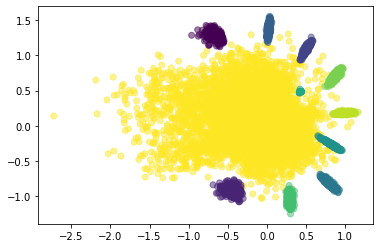

In [7]:
encoded_samples = encoder(data).numpy().T
encoded_samples = encoded_samples[:, ::-1]

plt.scatter(*encoded_samples, c=labels.numpy()[::-1], alpha=0.5)

## Pure tensorflow version

In [18]:
data_dimension = 101
encoding_dim = 2
batch_size = 32

inp = tf.keras.Input(shape=(data_dimension,), batch_size=batch_size)

encoded = tf.keras.layers.Dense(32)(inp)
encoded = tf.keras.layers.BatchNormalization()(encoded)
encoded = tf.keras.layers.Activation("relu")(encoded)
encoded = tf.keras.layers.Dense(32)(encoded)
encoded = tf.keras.layers.BatchNormalization()(encoded)
encoded = tf.keras.layers.Activation("relu")(encoded)
encoded = tf.keras.layers.Dense(encoding_dim)(encoded)

decoded = tf.keras.layers.Dense(32)(encoded)
decoded = tf.keras.layers.BatchNormalization()(decoded)
decoded = tf.keras.layers.Activation("relu")(decoded)
decoded = tf.keras.layers.Dense(32)(decoded)
decoded = tf.keras.layers.BatchNormalization()(decoded)
decoded = tf.keras.layers.Activation("relu")(decoded)
decoded = tf.keras.layers.Dense(data_dimension)(decoded)
loss = layers.TopologicalAutoencoderLoss(reg_lambda=0.44, numpy=False)(inp, encoded, decoded)

# This model maps an input to its reconstruction
autoencoder = tf.keras.Model(inp, loss)
encoder = tf.keras.Model(inp, encoded)

autoencoder.compile(optimizer='adam', loss=layers.identity)

In [ ]:
autoencoder.fit(data, data, epochs=50, batch_size=batch_size, shuffle=True)

In [ ]:
encoded_samples = encoder(data).numpy().T
encoded_samples = encoded_samples[:, ::-1]

plt.scatter(*encoded_samples, c=labels.numpy()[::-1], alpha=0.5)

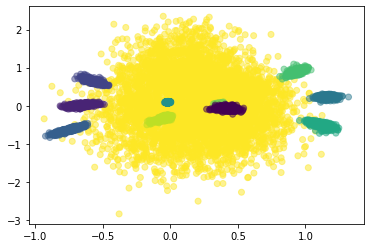

In [6]:
encoded_samples = encoder(data).numpy().T
encoded_samples = encoded_samples[:, ::-1]

plt.scatter(*encoded_samples, c=labels.numpy()[::-1], alpha=0.5)